# Data

In [4]:
import pandas as pd
import numpy as np

# Générer 2000 valeurs aléatoires pour la surface entre 30 et 200
surface = np.random.randint(30, 201, 2000)

# Générer des valeurs de loyer basées sur la surface avec un peu de bruit
# Assumons une relation linéaire simple : loyer = a * surface + b + bruit
a = 10 # Un coefficient pour la relation
b = 500 # Un terme constant
loyer = a * surface + b + np.random.normal(0, 100, 2000) # Ajouter un bruit gaussien

data_large = {'surface': surface, 'loyer': loyer}

df_large = pd.DataFrame(data_large)

print(df_large.head())
print(df_large.tail())
print(f"Nombre total d'instances : {len(df_large)}")

   surface        loyer
0       85  1324.162307
1      151  1934.797649
2       71  1234.533106
3       49   898.302458
4       70  1323.848096
      surface        loyer
1995      169  2227.708258
1996      177  2326.629900
1997      161  2199.524755
1998       49   943.195070
1999       31   719.339320
Nombre total d'instances : 2000


# Visualization

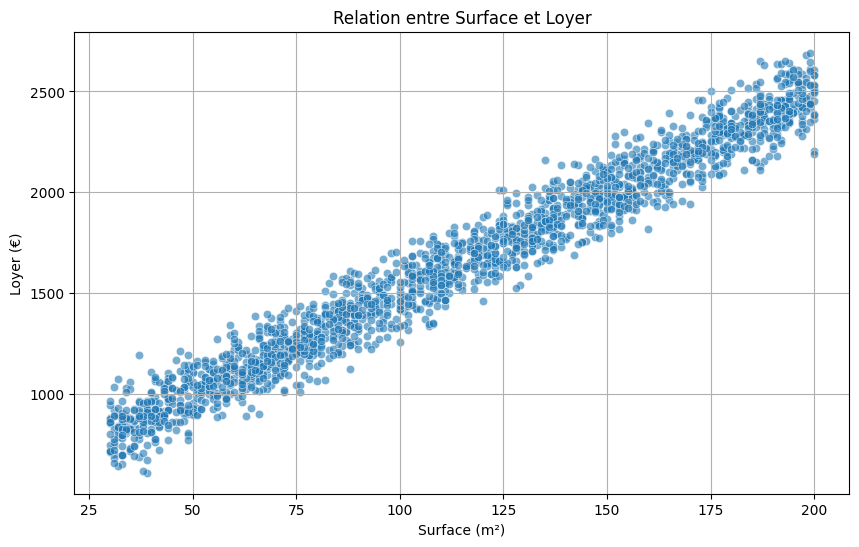

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un nuage de points de la surface vs le loyer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='surface', y='loyer', data=df_large, alpha=0.6)
plt.title('Relation entre Surface et Loyer')
plt.xlabel('Surface (m²)')
plt.ylabel('Loyer (€)')
plt.grid(True)
plt.show()

# B- SKLEARN

In [6]:
from sklearn.model_selection import train_test_split

# Créer X et y
X = df_large[['surface']] # S'assurer que X est un DataFrame
y = df_large['loyer']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1600, 1)
Shape of X_test: (400, 1)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [7]:
from sklearn.linear_model import LinearRegression

# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

print("Modèle de régression linéaire entraîné.")

Modèle de régression linéaire entraîné.


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculer le coefficient de détermination (R-squared)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 8869.426892177524
R-squared (R2): 0.9669640440172721


In [9]:
# Utiliser le modèle pour faire des prédictions sur X_test
predictions = model.predict(X_test)

# Afficher les premières prédictions et les comparer aux valeurs réelles de y_test
print("Comparaison des prédictions et des valeurs réelles:")
comparison_df = pd.DataFrame({'Réel': y_test.squeeze(), 'Prédiction': predictions})
display(comparison_df.head())

Comparaison des prédictions et des valeurs réelles:


,Réel,Prédiction
1860,1908.488627,1968.536064
353,2165.247516,2217.255748
1333,2498.244365,2495.821794
905,928.451497,1003.503690
1289,1454.750886,1471.096696


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normaliser les features et la target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)) # Reshape y for StandardScaler

# Diviser les données normalisées en ensembles d'entraînement et de test
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
print(f"Shape of y_train_scaled: {y_train_scaled.shape}")
print(f"Shape of y_test_scaled: {y_test_scaled.shape}")

Shape of X_train_scaled: (1600, 1)
Shape of X_test_scaled: (400, 1)
Shape of y_train_scaled: (1600, 1)
Shape of y_test_scaled: (400, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


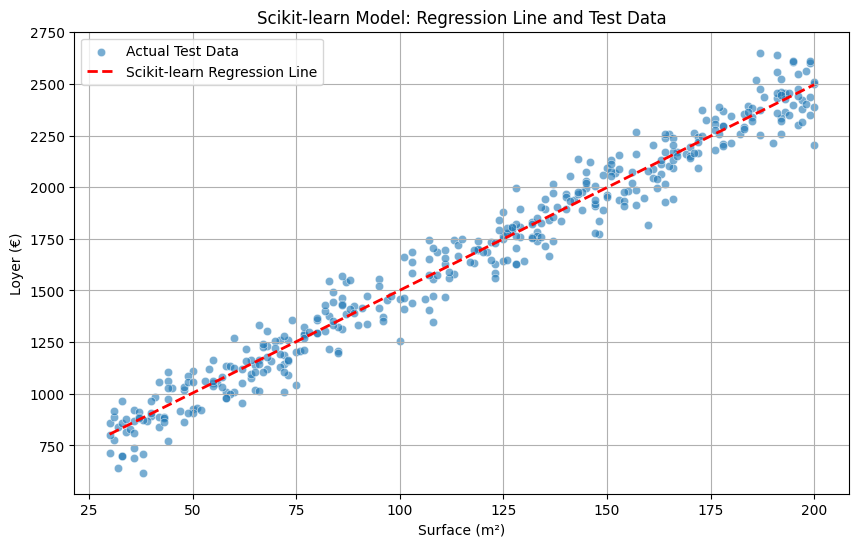

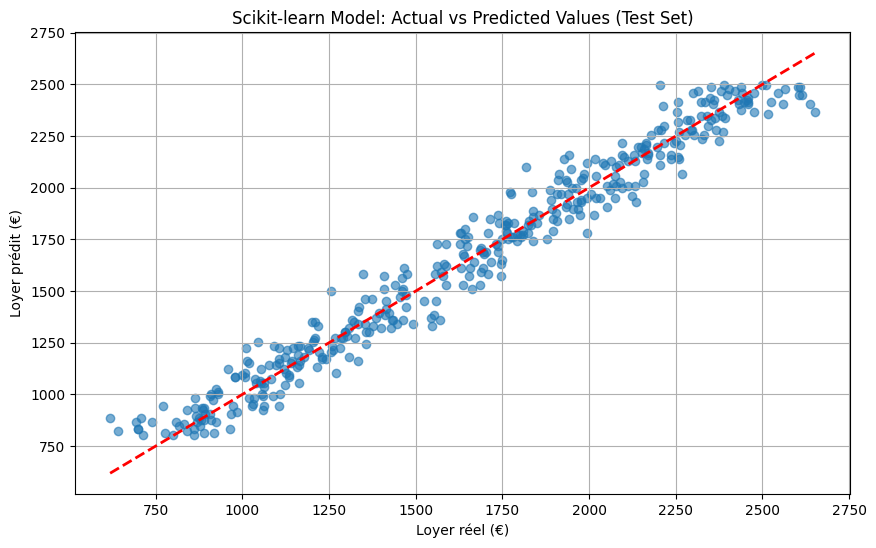

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser les données d'entraînement et la droite de régression du modèle scikit-learn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['surface'].squeeze(), y=y_test, label='Actual Test Data', alpha=0.6)

# Tracer la droite de régression du modèle scikit-learn
# La droite est définie par y = mx + c, où m est le coefficient et c est l'intercept
# Pour tracer la droite, nous avons besoin de deux points. Nous pouvons utiliser le min et max de X_test.
x_min = X_test['surface'].min()
x_max = X_test['surface'].max()
y_min_pred = model.predict([[x_min]])[0]
y_max_pred = model.predict([[x_max]])[0]

plt.plot([x_min, x_max], [y_min_pred, y_max_pred], color='red', linestyle='--', linewidth=2, label='Scikit-learn Regression Line')

plt.title('Scikit-learn Model: Regression Line and Test Data')
plt.xlabel('Surface (m²)')
plt.ylabel('Loyer (€)')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, visualize actual vs predicted values for scikit-learn model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Scikit-learn Model: Actual vs Predicted Values (Test Set)')
plt.xlabel('Loyer réel (€)')
plt.ylabel('Loyer prédit (€)')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal prediction line
plt.show()

# C- Tensorflow



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model_tf = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],)) # Single unit for regression, input shape based on feature dimension
])

# Print the model summary
model_tf.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model_tf.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model_tf.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_scaled)
)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.1665 - val_loss: 0.0360 - val_mean_absolute_error: 0.1505
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0376 - mean_absolute_error: 0.1556 - val_loss: 0.0349 - val_mean_absolute_error: 0.1477
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 - mean_absolute_error: 0.1545 - val_loss: 0.0347 - val_mean_absolute_error: 0.1475
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.1562 - val_loss: 0.0348 - val_mean_absolute_error: 0.1475
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0377 - mean_absolute_error: 0.1550 - val_loss: 0.0348 - val_mean_absolute_error: 0.1475
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0374 - mean_absolute_error: 0.1522 - val_loss: 0.0347 - val_mean_absolute_error: 0.1476
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0392 - mean_absolute_error: 0.1561 - val_loss

In [13]:
# Evaluate the model on the test set
loss, mae = model_tf.evaluate(X_test_scaled, y_test_scaled, verbose=0)

# Display the evaluation metrics
print(f"Test Loss (MSE): {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")

Test Loss (MSE): 0.034761928021907806
Test Mean Absolute Error (MAE): 0.14754408597946167


In [14]:
# Utiliser le modèle TensorFlow entraîné pour faire des prédictions sur l'ensemble de test normalisé
y_pred_scaled_tf = model_tf.predict(X_test_scaled)

# Ramener les prédictions à leur échelle d'origine
y_pred_tf = scaler_y.inverse_transform(y_pred_scaled_tf)

# Afficher les premières prédictions dénormalisées et les comparer aux valeurs réelles de y_test
print("Comparaison des prédictions TensorFlow et des valeurs réelles:")
comparison_df_tf = pd.DataFrame({'Réel': y_test.squeeze(), 'Prédiction TensorFlow': y_pred_tf.squeeze()})
display(comparison_df_tf.head())

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Comparaison des prédictions TensorFlow et des valeurs réelles:


,Réel,Prédiction TensorFlow
1860,1908.488627,1969.001465
353,2165.247516,2217.640381
1333,2498.244365,2496.115967
905,928.451497,1004.282349
1289,1454.750886,1471.723511


# A

In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Créer X_np et y_np
X_np = df_large[['surface']].values # S'assurer que X_np est un tableau NumPy 2D
y_np = df_large['loyer'].values # y_np est un tableau NumPy 1D

# Normaliser X_np et y_np
scaler_X_np = StandardScaler()
scaler_y_np = StandardScaler()

X_scaled_np = scaler_X_np.fit_transform(X_np)
y_scaled_np = scaler_y_np.fit_transform(y_np.reshape(-1, 1)).flatten() # Reshape y_np for StandardScaler and flatten back to 1D

# Afficher les shapes
print(f"Shape of X_scaled_np: {X_scaled_np.shape}")
print(f"Shape of y_scaled_np: {y_scaled_np.shape}")

Shape of X_scaled_np: (2000, 1)
Shape of y_scaled_np: (2000,)


In [16]:
# Initialiser les poids (weights) comme un tableau NumPy de forme (1,) avec des valeurs aléatoires petites
weights = np.random.randn(1)

# Initialiser le biais (bias) comme un scalaire avec une valeur initiale de 0
bias = 0

# Afficher les valeurs initiales des poids et du biais
print(f"Initial weights: {weights}")
print(f"Initial bias: {bias}")

Initial weights: [0.38410461]
Initial bias: 0


In [17]:
def predict(X_scaled_np, weights, bias):
  """
  Calculates the predicted values using the scaled features, weights, and bias.

  Args:
    X_scaled_np: A NumPy array of scaled features.
    weights: A NumPy array of weights.
    bias: A scalar bias value.

  Returns:
    A NumPy array of predicted values.
  """
  return np.dot(X_scaled_np, weights) + bias

# Example usage (optional, for verification)
# predictions_example = predict(X_scaled_np[:5], weights, bias)
# print("Example predictions:", predictions_example)

In [18]:
def compute_cost(X_scaled_np, y_scaled_np, weights, bias):
  """
  Calculates the cost (Mean Squared Error) of the predictions.

  Args:
    X_scaled_np: A NumPy array of scaled features.
    y_scaled_np: A NumPy array of scaled true target values.
    weights: A NumPy array of weights.
    bias: A scalar bias value.

  Returns:
    The Mean Squared Error (MSE) as a scalar.
  """
  m = len(y_scaled_np)
  predictions = predict(X_scaled_np, weights, bias)
  squared_error = (predictions - y_scaled_np) ** 2
  cost = np.sum(squared_error) / (2 * m)
  return cost

# Example usage (optional, for verification)
# initial_cost = compute_cost(X_scaled_np, y_scaled_np, weights, bias)
# print(f"Initial cost: {initial_cost}")

In [19]:
def compute_gradient(X_scaled_np, y_scaled_np, weights, bias):
  """
  Calculates the gradients for weights and bias.

  Args:
    X_scaled_np: A NumPy array of scaled features.
    y_scaled_np: A NumPy array of scaled true target values.
    weights: A NumPy array of weights.
    bias: A scalar bias value.

  Returns:
    A tuple containing the gradients for weights (dW) and bias (db).
  """
  m = len(y_scaled_np)
  predictions = predict(X_scaled_np, weights, bias)
  error = predictions - y_scaled_np

  dW = (1/m) * np.dot(X_scaled_np.T, error)
  db = (1/m) * np.sum(error)

  return dW, db

def gradient_descent(X_scaled_np, y_scaled_np, weights, bias, learning_rate, num_iterations):
  """
  Performs gradient descent to update weights and bias.

  Args:
    X_scaled_np: A NumPy array of scaled features.
    y_scaled_np: A NumPy array of scaled true target values.
    weights: Initial NumPy array of weights.
    bias: Initial scalar bias value.
    learning_rate: The learning rate for gradient descent.
    num_iterations: The number of iterations to perform gradient descent.

  Returns:
    A tuple containing the final weights, final bias, and a list of cost history.
  """
  cost_history = []

  for i in range(num_iterations):
    dW, db = compute_gradient(X_scaled_np, y_scaled_np, weights, bias)

    weights = weights - learning_rate * dW
    bias = bias - learning_rate * db

    cost = compute_cost(X_scaled_np, y_scaled_np, weights, bias)
    cost_history.append(cost)

    # Optional: Print cost every certain number of iterations
    if i % (num_iterations // 10) == 0:
      print(f"Iteration {i}: Cost = {cost}")

  return weights, bias, cost_history

In [20]:
# Définir le taux d'apprentissage et le nombre d'itérations
learning_rate = 0.01
num_iterations = 1000

# Exécuter la descente de gradient
final_weights, final_bias, cost_history = gradient_descent(
    X_scaled_np, y_scaled_np, weights, bias, learning_rate, num_iterations
)

# Afficher les poids et le biais finaux
print(f"\nFinal weights: {final_weights}")
print(f"Final bias: {final_bias}")

Iteration 0: Cost = 0.19346985985136478
Iteration 100: Cost = 0.042333521110476356
Iteration 200: Cost = 0.022084323586749346
Iteration 300: Cost = 0.019371342686385754
Iteration 400: Cost = 0.01900785838745917
Iteration 500: Cost = 0.018959158879273016
Iteration 600: Cost = 0.018952634135000493
Iteration 700: Cost = 0.018951759951884327
Iteration 800: Cost = 0.018951642829114657
Iteration 900: Cost = 0.018951627137044055

Final weights: [0.98083954]
Final bias: 5.5337956439416327e-17


In [21]:
# Utiliser la fonction predict avec les données normalisées et les paramètres finaux
y_pred_scaled_np = predict(X_scaled_np, final_weights, final_bias)

# Dénormaliser les prédictions
# Assurez-vous que y_pred_scaled_np est un tableau 2D pour inverse_transform
y_pred_np = scaler_y_np.inverse_transform(y_pred_scaled_np.reshape(-1, 1))

# Afficher les premières prédictions dénormalisées
print("Premières prédictions dénormalisées (NumPy):")
print(y_pred_np[:5].flatten()) # Flatten to display as a 1D array

Premières prédictions dénormalisées (NumPy):
[1350.38790976 2007.69055471 1210.96007598  991.85919433 1201.000945  ]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse_np = mean_squared_error(y_np, y_pred_np)

# Calculate the R-squared (R2)
r2_np = r2_score(y_np, y_pred_np)

# Display the results
print(f"NumPy Model Mean Squared Error (MSE): {mse_np}")
print(f"NumPy Model R-squared (R2): {r2_np}")

NumPy Model Mean Squared Error (MSE): 9678.527271736173
NumPy Model R-squared (R2): 0.9620967499175407


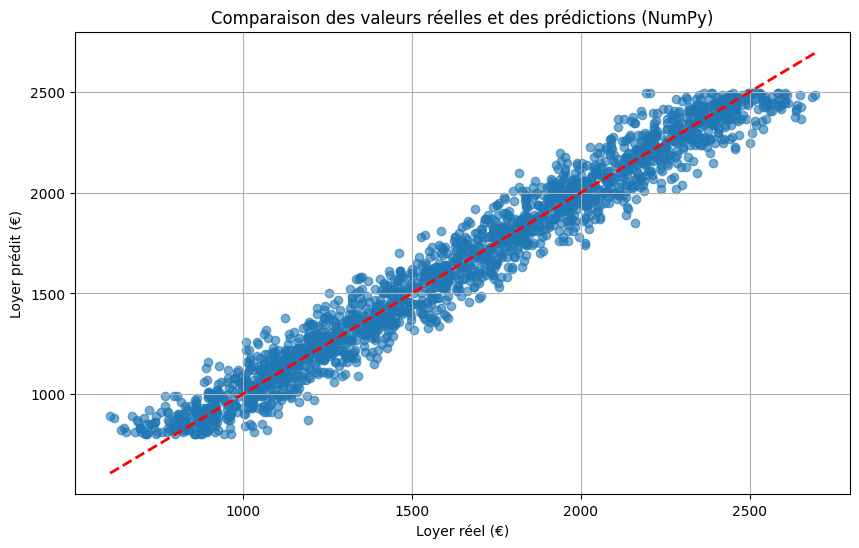

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_np, y_pred_np, alpha=0.6)
plt.title('Comparaison des valeurs réelles et des prédictions (NumPy)')
plt.xlabel('Loyer réel (€)')
plt.ylabel('Loyer prédit (€)')
plt.grid(True)

# Add the regression line (y=x)
plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], 'r--', lw=2)

plt.show()

In [25]:
# Comparaison des modèles

print("--- Comparaison des Modèles ---")

# Scikit-learn Model
print("\nScikit-learn Model:")
print(f"  Coefficient (Slope): {model.coef_[0]}")
print(f"  Intercept (Bias): {model.intercept_}")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  R-squared (R2): {r2}")

# TensorFlow Model
print("\nTensorFlow Model:")
# Extract weight and bias from the single dense layer
tf_weights, tf_bias = model_tf.layers[0].get_weights()
print(f"  Weight (Slope - scaled): {tf_weights[0][0]}")
print(f"  Bias (Intercept - scaled): {tf_bias[0]}")
print(f"  Test Loss (MSE - scaled): {loss}")
print(f"  Test Mean Absolute Error (MAE - scaled): {mae}")

# NumPy Model (Gradient Descent)
print("\nNumPy Model (Gradient Descent):")
print(f"  Final weights (Slope - scaled): {final_weights[0]}")
print(f"  Final bias (Intercept - scaled): {final_bias}")
print(f"  Mean Squared Error (MSE): {mse_np}")
print(f"  R-squared (R2): {r2_np}")

print("\nNote: The TensorFlow and NumPy parameters (weights and bias) are on the scaled data.")

--- Comparaison des Modèles ---

Scikit-learn Model:
  Coefficient (Slope): 9.948787361508483
  Intercept (Bias): 506.06432186069264
  Mean Squared Error (MSE): 8869.426892177524
  R-squared (R2): 0.9669640440172721

TensorFlow Model:
  Weight (Slope - scaled): 0.97950279712677
  Bias (Intercept - scaled): 0.0031345628667622805
  Test Loss (MSE - scaled): 0.034761928021907806
  Test Mean Absolute Error (MAE - scaled): 0.14754408597946167

NumPy Model (Gradient Descent):
  Final weights (Slope - scaled): 0.9808395441500442
  Final bias (Intercept - scaled): 5.5337956439416327e-17
  Mean Squared Error (MSE): 9678.527271736173
  R-squared (R2): 0.9620967499175407

Note: The TensorFlow and NumPy parameters (weights and bias) are on the scaled data.
